In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [3]:
charge2020 = pd.read_csv('2020년제주충전량마지막.csv')
tour2020 = pd.read_excel('2020년제주여행객마지막.xlsx')

In [4]:
charge2020 = charge2020.drop('Unnamed: 0', axis=1)
tour2020 = tour2020.drop('Unnamed: 0', axis=1)

In [5]:
charge2020

,구,충전소명,month,충전량
0,서귀포시,가시리 조랑말체험공원,2020-01,1012.70
1,서귀포시,가시리 조랑말체험공원,2020-02,911.07
2,서귀포시,가시리 조랑말체험공원,2020-03,1998.49
3,서귀포시,가시리 조랑말체험공원,2020-04,1558.08
4,서귀포시,가시리 조랑말체험공원,2020-05,669.18
...,...,...,...,...
2987,제주시,화북주공2 아파트,2020-11,3052.51
2988,제주시,화북주공2 아파트,2020-12,346.83
2989,제주시,환경성질환예방관리센터,2020-07,1.52
2990,제주시,환경성질환예방관리센터,2020-08,12.25


In [6]:
tour2020.rename(columns = {'군구':'구'}, inplace=True)
tour2020.head(3)

,시도,구,관광지,내/외국인,20년총계,인원계,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,제주특별자치도,제주시,국립제주박물관,내국인,173066,82044,24272,8958,0,0,5968,6133,5726,10246,1096,3913,9279,6453
1,제주특별자치도,제주시,국립제주박물관,외국인,1339,850,398,88,0,0,33,28,94,59,0,7,87,56
2,제주특별자치도,제주시,국립제주박물관,합계,174405,82894,24670,9046,0,0,6001,6161,5820,10305,1096,3920,9366,6509


In [7]:
tour2020

,시도,구,관광지,내/외국인,20년총계,인원계,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,제주특별자치도,제주시,국립제주박물관,내국인,173066,82044,24272,8958,0,0,5968,6133,5726,10246,1096,3913,9279,6453
1,제주특별자치도,제주시,국립제주박물관,외국인,1339,850,398,88,0,0,33,28,94,59,0,7,87,56
2,제주특별자치도,제주시,국립제주박물관,합계,174405,82894,24670,9046,0,0,6001,6161,5820,10305,1096,3920,9366,6509
3,제주특별자치도,제주시,도립미술관,내국인,63223,26123,11504,5424,0,0,0,928,2232,1836,79,1420,1537,1163
4,제주특별자치도,제주시,도립미술관,외국인,1871,1494,1328,55,0,0,0,25,23,25,4,7,16,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,제주특별자치도,서귀포시,퍼시픽랜드,외국인,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104,제주특별자치도,서귀포시,퍼시픽랜드,합계,233601,110174,22429,5416,111,3657,9450,9138,11533,16602,6899,9738,11215,3986
105,제주특별자치도,서귀포시,한화아쿠아플라넷제주,내국인,1118429,443699,60309,18888,11677,11717,27719,33258,56658,76566,31598,43087,51751,20471
106,제주특별자치도,서귀포시,한화아쿠아플라넷제주,외국인,12428,11520,7542,2877,35,30,76,168,384,221,41,72,48,26


In [8]:
# tour2020 = tour2020.set_index(['시도', '구', '관광지', '내/외국인'])
# tour2020

In [9]:
je = tour2020[tour2020['구'] == '제주시']
je[je['내/외국인'] == '합계'].reset_index()

,index,시도,구,관광지,내/외국인,20년총계,인원계,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,2,제주특별자치도,제주시,국립제주박물관,합계,174405,82894,24670,9046,0,0,6001,6161,5820,10305,1096,3920,9366,6509
1,5,제주특별자치도,제주시,도립미술관,합계,65094,27617,12832,5479,0,0,0,953,2255,1861,83,1427,1553,1174
2,8,제주특별자치도,제주시,만장굴관광지,합계,646332,310848,37506,18882,12678,10822,22405,23407,35273,69877,20470,27267,24929,7332
3,11,제주특별자치도,제주시,민속자연사박물관,합계,140613,60228,22790,6239,103,0,0,1742,4729,8277,183,4511,7582,4072
4,14,제주특별자치도,제주시,비자림,합계,1222341,607945,49012,31732,31260,30457,54456,57556,64278,72224,42471,76623,75027,22849
5,17,제주특별자치도,제주시,삼양선사유적지,합계,30934,16126,3221,1849,1437,1844,1448,1072,1082,1122,22,1005,1306,718
6,20,제주특별자치도,제주시,절물자연휴양림,합계,1001539,545323,31955,21730,32852,33272,53862,50997,61638,81183,38287,57383,57651,24513
7,23,제주특별자치도,제주시,제주도립 김창열미술관,합계,82097,21981,4418,2213,0,0,0,941,2839,4409,42,1932,3292,1895
8,26,제주특별자치도,제주시,제주돌문화공원,합계,171534,66896,7397,3811,4215,5056,8807,5723,6286,5314,63,7221,9826,3177
9,29,제주특별자치도,제주시,제주목관아지,합계,99628,55768,18190,5742,2435,2687,3982,3869,4501,4530,65,2782,5026,1959


In [10]:
seo = tour2020[tour2020['구'] == '서귀포시']
seo[seo['내/외국인'] == '합계'].reset_index()

,index,시도,구,관광지,내/외국인,20년총계,인원계,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,50,제주특별자치도,서귀포시,감귤박물관,합계,82428,33713,16540,4274,236,0,0,474,1706,2570,91,1508,4573,1741
1,53,제주특별자치도,서귀포시,기당미술관,합계,20187,7230,1867,1026,0,0,0,330,763,983,23,555,1076,607
2,56,제주특별자치도,서귀포시,마라해양도립공원,합계,1116994,481741,49115,24258,23546,40906,53751,33119,30763,41326,28710,66302,66832,23113
3,59,제주특별자치도,서귀포시,박물관은살아있다,합계,312948,161338,36241,12208,7430,5120,10583,11092,15808,23101,8253,11011,13994,6497
4,62,제주특별자치도,서귀포시,산방산,합계,631900,379224,42049,29717,33657,33225,36082,18542,28369,25711,13856,47417,42784,27815
5,65,제주특별자치도,서귀포시,서귀포도립해양공원,합계,167633,73432,13095,3641,1209,1875,5880,4780,6107,11356,2663,9142,10997,2687
6,68,제주특별자치도,서귀포시,서귀포자연휴양림,합계,281254,141531,5039,3437,6341,6178,11520,11462,16822,30530,7692,16686,19920,5904
7,71,제주특별자치도,서귀포시,서복전시관,합계,28717,9719,2203,1023,0,0,0,398,1105,1003,20,1196,1845,926
8,74,제주특별자치도,서귀포시,성산일출봉,합계,1043040,560050,98480,39293,31252,26513,47679,36846,46640,45920,36200,62303,63674,25250
9,77,제주특별자치도,서귀포시,이중섭미술관,합계,114057,46567,17823,7177,0,0,0,872,4142,5067,180,3274,4996,3036


In [11]:
tour2020 = tour2020.T

In [12]:
tour2020 = tour2020.drop(index='시도')
tour2020

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
구,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,...,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시
관광지,국립제주박물관,국립제주박물관,국립제주박물관,도립미술관,도립미술관,도립미술관,만장굴관광지,만장굴관광지,만장굴관광지,민속자연사박물관,...,천지연폭포,카멜리아힐,카멜리아힐,카멜리아힐,퍼시픽랜드,퍼시픽랜드,퍼시픽랜드,한화아쿠아플라넷제주,한화아쿠아플라넷제주,한화아쿠아플라넷제주
내/외국인,내국인,외국인,합계,내국인,외국인,합계,내국인,외국인,합계,내국인,...,합계,내국인,외국인,합계,내국인,외국인,합계,내국인,외국인,합계
20년총계,173066,1339,174405,63223,1871,65094,628882,17450,646332,130641,...,1529927,918181,478,918659,233601,0,233601,1118429,12428,1130857
인원계,82044,850,82894,26123,1494,27617,300484,10364,310848,50584,...,715436,413812,32,413844,110174,0,110174,443699,11520,455219
2020-01,24272,398,24670,11504,1328,12832,34978,2528,37506,14790,...,84330,75245,25,75270,22429,0,22429,60309,7542,67851
2020-02,8958,88,9046,5424,55,5479,17328,1554,18882,4735,...,42516,23089,7,23096,5416,0,5416,18888,2877,21765
2020-03,0,0,0,0,0,0,12385,293,12678,101,...,38163,11935,0,11935,111,0,111,11677,35,11712
2020-04,0,0,0,0,0,0,10660,162,10822,0,...,35018,12072,0,12072,3657,0,3657,11717,30,11747
2020-05,5968,33,6001,0,0,0,21862,543,22405,0,...,64014,36393,0,36393,9450,0,9450,27719,76,27795


In [13]:
cols = list(range(2, 108, 3))  # 2부터 108까지 3씩 증가하는 인덱스 리스트
result = tour2020.iloc[:, cols]  # 해당 인덱스에 해당하는 열들만 선택
result

,2,5,8,11,14,17,20,23,26,29,...,80,83,86,89,92,95,98,101,104,107
구,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,...,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시
관광지,국립제주박물관,도립미술관,만장굴관광지,민속자연사박물관,비자림,삼양선사유적지,절물자연휴양림,제주도립 김창열미술관,제주돌문화공원,제주목관아지,...,일출랜드,정방폭포,제주국제평화센터,제주추사관,중문대포해안주상절리대,천제연폭포,천지연폭포,카멜리아힐,퍼시픽랜드,한화아쿠아플라넷제주
내/외국인,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,...,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
20년총계,174405,65094,646332,140613,1222341,30934,1001539,82097,171534,99628,...,183314,997498,11351,43969,1186806,619942,1529927,918659,233601,1130857
인원계,82894,27617,310848,60228,607945,16126,545323,21981,66896,55768,...,85944,459194,5225,22317,536986,273679,715436,413844,110174,455219
2020-01,24670,12832,37506,22790,49012,3221,31955,4418,7397,18190,...,17016,49461,1938,5545,80133,35931,84330,75270,22429,67851
2020-02,9046,5479,18882,6239,31732,1849,21730,2213,3811,5742,...,4719,29234,535,2911,34499,17106,42516,23096,5416,21765
2020-03,0,0,12678,103,31260,1437,32852,0,4215,2435,...,2253,21422,0,0,25181,13976,38163,11935,111,11712
2020-04,0,0,10822,0,30457,1844,33272,0,5056,2687,...,2502,19637,0,0,22874,12444,35018,12072,3657,11747
2020-05,6001,0,22405,0,54456,1448,53862,0,8807,3982,...,5293,37408,0,0,41529,22472,64014,36393,9450,27795


In [14]:
jejudo2020 = result.T
jejudo2020

,구,관광지,내/외국인,20년총계,인원계,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
2,제주시,국립제주박물관,합계,174405,82894,24670,9046,0,0,6001,6161,5820,10305,1096,3920,9366,6509
5,제주시,도립미술관,합계,65094,27617,12832,5479,0,0,0,953,2255,1861,83,1427,1553,1174
8,제주시,만장굴관광지,합계,646332,310848,37506,18882,12678,10822,22405,23407,35273,69877,20470,27267,24929,7332
11,제주시,민속자연사박물관,합계,140613,60228,22790,6239,103,0,0,1742,4729,8277,183,4511,7582,4072
14,제주시,비자림,합계,1222341,607945,49012,31732,31260,30457,54456,57556,64278,72224,42471,76623,75027,22849
17,제주시,삼양선사유적지,합계,30934,16126,3221,1849,1437,1844,1448,1072,1082,1122,22,1005,1306,718
20,제주시,절물자연휴양림,합계,1001539,545323,31955,21730,32852,33272,53862,50997,61638,81183,38287,57383,57651,24513
23,제주시,제주도립 김창열미술관,합계,82097,21981,4418,2213,0,0,0,941,2839,4409,42,1932,3292,1895
26,제주시,제주돌문화공원,합계,171534,66896,7397,3811,4215,5056,8807,5723,6286,5314,63,7221,9826,3177
29,제주시,제주목관아지,합계,99628,55768,18190,5742,2435,2687,3982,3869,4501,4530,65,2782,5026,1959


In [15]:
jejudo2020[jejudo2020['구'] == '제주시']

,구,관광지,내/외국인,20년총계,인원계,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
2,제주시,국립제주박물관,합계,174405,82894,24670,9046,0,0,6001,6161,5820,10305,1096,3920,9366,6509
5,제주시,도립미술관,합계,65094,27617,12832,5479,0,0,0,953,2255,1861,83,1427,1553,1174
8,제주시,만장굴관광지,합계,646332,310848,37506,18882,12678,10822,22405,23407,35273,69877,20470,27267,24929,7332
11,제주시,민속자연사박물관,합계,140613,60228,22790,6239,103,0,0,1742,4729,8277,183,4511,7582,4072
14,제주시,비자림,합계,1222341,607945,49012,31732,31260,30457,54456,57556,64278,72224,42471,76623,75027,22849
17,제주시,삼양선사유적지,합계,30934,16126,3221,1849,1437,1844,1448,1072,1082,1122,22,1005,1306,718
20,제주시,절물자연휴양림,합계,1001539,545323,31955,21730,32852,33272,53862,50997,61638,81183,38287,57383,57651,24513
23,제주시,제주도립 김창열미술관,합계,82097,21981,4418,2213,0,0,0,941,2839,4409,42,1932,3292,1895
26,제주시,제주돌문화공원,합계,171534,66896,7397,3811,4215,5056,8807,5723,6286,5314,63,7221,9826,3177
29,제주시,제주목관아지,합계,99628,55768,18190,5742,2435,2687,3982,3869,4501,4530,65,2782,5026,1959


In [16]:
jeju2020 = jejudo2020.set_index('구')

In [17]:
jeju2020

,관광지,내/외국인,20년총계,인원계,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
구,,,,,,,,,,,,,,,,
제주시,국립제주박물관,합계,174405,82894,24670,9046,0,0,6001,6161,5820,10305,1096,3920,9366,6509
제주시,도립미술관,합계,65094,27617,12832,5479,0,0,0,953,2255,1861,83,1427,1553,1174
제주시,만장굴관광지,합계,646332,310848,37506,18882,12678,10822,22405,23407,35273,69877,20470,27267,24929,7332
제주시,민속자연사박물관,합계,140613,60228,22790,6239,103,0,0,1742,4729,8277,183,4511,7582,4072
제주시,비자림,합계,1222341,607945,49012,31732,31260,30457,54456,57556,64278,72224,42471,76623,75027,22849
제주시,삼양선사유적지,합계,30934,16126,3221,1849,1437,1844,1448,1072,1082,1122,22,1005,1306,718
제주시,절물자연휴양림,합계,1001539,545323,31955,21730,32852,33272,53862,50997,61638,81183,38287,57383,57651,24513
제주시,제주도립 김창열미술관,합계,82097,21981,4418,2213,0,0,0,941,2839,4409,42,1932,3292,1895
제주시,제주돌문화공원,합계,171534,66896,7397,3811,4215,5056,8807,5723,6286,5314,63,7221,9826,3177


In [18]:
jeju2020 = jeju2020.groupby(['구']).sum().reset_index().replace({'구': {'서귀포시': '서귀포시'}})
jeju2020

,구,관광지,내/외국인,20년총계,인원계,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,서귀포시,감귤박물관기당미술관마라해양도립공원박물관은살아있다산방산서귀포도립해양공원서귀포자연휴양림...,합계합계합계합계합계합계합계합계합계합계합계합계합계합계합계합계합계합계합계합계,10655082,4972563,722356,307851,228424,233768,409849,365462,461629,566304,289011,546583,584360,256966
1,제주시,국립제주박물관도립미술관만장굴관광지민속자연사박물관비자림삼양선사유적지절물자연휴양림제주도...,합계합계합계합계합계합계합계합계합계합계합계합계합계합계합계합계,5491691,2703550,351884,195555,120901,126930,223446,210669,246534,328351,157542,313294,300181,128263


In [19]:
jeju2020 = jeju2020.drop(columns=['관광지', '내/외국인', '20년총계', '인원계'], axis=1)

In [20]:
jeju2020.T

,0,1
구,서귀포시,제주시
2020-01,722356,351884
2020-02,307851,195555
2020-03,228424,120901
2020-04,233768,126930
2020-05,409849,223446
2020-06,365462,210669
2020-07,461629,246534
2020-08,566304,328351
2020-09,289011,157542


In [21]:
new_jeju2020 = jeju2020.transpose()
new_jeju2020.columns = new_jeju2020.iloc[0]
new_jeju2020 = new_jeju2020.drop(new_jeju2020.index[0])
new_jeju2020

구,서귀포시,제주시
2020-01,722356,351884
2020-02,307851,195555
2020-03,228424,120901
2020-04,233768,126930
2020-05,409849,223446
2020-06,365462,210669
2020-07,461629,246534
2020-08,566304,328351
2020-09,289011,157542
2020-10,546583,313294


In [22]:
new_jeju2020

구,서귀포시,제주시
2020-01,722356,351884
2020-02,307851,195555
2020-03,228424,120901
2020-04,233768,126930
2020-05,409849,223446
2020-06,365462,210669
2020-07,461629,246534
2020-08,566304,328351
2020-09,289011,157542
2020-10,546583,313294


In [23]:
# charge2020_pivot.to_csv('2020년월별총충전량.csv')

In [25]:
new_jeju2020_sum = pd.DataFrame(new_jeju2020.sum()).T
new_jeju2020_sum

구,서귀포시,제주시
0,4972563,2703550


In [26]:
# pd.options.display.float_format = '{:.0f}'.format

In [28]:
# 제주도 구별 월별 총충전량
charge2020_monthly = charge2020.groupby(['구', 'month']).sum().reset_index()
charge2020_pivot = charge2020_monthly.pivot_table(values='충전량', index='month', columns='구', fill_value=0)

In [29]:
charge2020_pivot = charge2020_pivot.rename(columns={'서귀포시': '서귀포시(총충전량)', '제주시': '제주시(총충전량)'})

In [30]:
new_jeju2020 = new_jeju2020.rename(columns={'서귀포시': '서귀포시(여행객수)', '제주시': '제주시(여행객수)'})

In [58]:
df = pd.concat([charge2020_pivot, new_jeju2020], axis=1)
df

구,서귀포시(총충전량),제주시(총충전량),서귀포시(여행객수),제주시(여행객수)
2020-01,101867.6950,307775.675000,722356,351884
2020-02,83660.2300,255440.225000,307851,195555
2020-03,78834.3800,243940.670000,228424,120901
2020-04,81547.0450,240473.344866,233768,126930
2020-05,98466.4580,250564.545000,409849,223446
2020-06,88129.4900,249388.585000,365462,210669
2020-07,98569.0375,292902.970000,461629,246534
2020-08,106281.8350,314822.807000,566304,328351
2020-09,94906.8850,246233.441000,289011,157542
2020-10,102265.9050,261479.297500,546583,313294


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2020-01 to 2020-12
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   서귀포시(총충전량)  12 non-null     float64
 1   제주시(총충전량)   12 non-null     float64
 2   서귀포시(여행객수)  12 non-null     object 
 3   제주시(여행객수)   12 non-null     object 
dtypes: float64(2), object(2)
memory usage: 780.0+ bytes


In [60]:
obj_cols = df.select_dtypes(include='object').columns

df[obj_cols] = df[obj_cols].apply(pd.to_numeric, errors='coerce')

df = df.astype(float)

In [61]:
df

구,서귀포시(총충전량),제주시(총충전량),서귀포시(여행객수),제주시(여행객수)
2020-01,101867.6950,307775.675000,722356.0,351884.0
2020-02,83660.2300,255440.225000,307851.0,195555.0
2020-03,78834.3800,243940.670000,228424.0,120901.0
2020-04,81547.0450,240473.344866,233768.0,126930.0
2020-05,98466.4580,250564.545000,409849.0,223446.0
2020-06,88129.4900,249388.585000,365462.0,210669.0
2020-07,98569.0375,292902.970000,461629.0,246534.0
2020-08,106281.8350,314822.807000,566304.0,328351.0
2020-09,94906.8850,246233.441000,289011.0,157542.0
2020-10,102265.9050,261479.297500,546583.0,313294.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2020-01 to 2020-12
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   서귀포시(총충전량)  12 non-null     float64
 1   제주시(총충전량)   12 non-null     float64
 2   서귀포시(여행객수)  12 non-null     float64
 3   제주시(여행객수)   12 non-null     float64
dtypes: float64(4)
memory usage: 780.0+ bytes


In [63]:
df['제주도(총충전량)'] = df['서귀포시(총충전량)'] + df['제주시(총충전량)']

In [64]:
df['제주도(여행객수)'] = df['서귀포시(여행객수)'] + df['제주시(여행객수)']

In [57]:
# df.drop(['서귀포시(총충전량)','제주시(총충전량)','서귀포시(여행객수)','제주시(여행객수)'],axis=1)

구,제주도(총충전량),제주도(여행객수)
2020-01,409643.370000,1074240.0
2020-02,339100.455000,503406.0
2020-03,322775.050000,349325.0
2020-04,322020.389866,360698.0
2020-05,349031.003000,633295.0
2020-06,337518.075000,576131.0
2020-07,391472.007500,708163.0
2020-08,421104.642000,894655.0
2020-09,341140.326000,446553.0
2020-10,363745.202500,859877.0


In [65]:
df

구,서귀포시(총충전량),제주시(총충전량),서귀포시(여행객수),제주시(여행객수),제주도(총충전량),제주도(여행객수)
2020-01,101867.6950,307775.675000,722356.0,351884.0,409643.370000,1074240.0
2020-02,83660.2300,255440.225000,307851.0,195555.0,339100.455000,503406.0
2020-03,78834.3800,243940.670000,228424.0,120901.0,322775.050000,349325.0
2020-04,81547.0450,240473.344866,233768.0,126930.0,322020.389866,360698.0
2020-05,98466.4580,250564.545000,409849.0,223446.0,349031.003000,633295.0
2020-06,88129.4900,249388.585000,365462.0,210669.0,337518.075000,576131.0
2020-07,98569.0375,292902.970000,461629.0,246534.0,391472.007500,708163.0
2020-08,106281.8350,314822.807000,566304.0,328351.0,421104.642000,894655.0
2020-09,94906.8850,246233.441000,289011.0,157542.0,341140.326000,446553.0
2020-10,102265.9050,261479.297500,546583.0,313294.0,363745.202500,859877.0


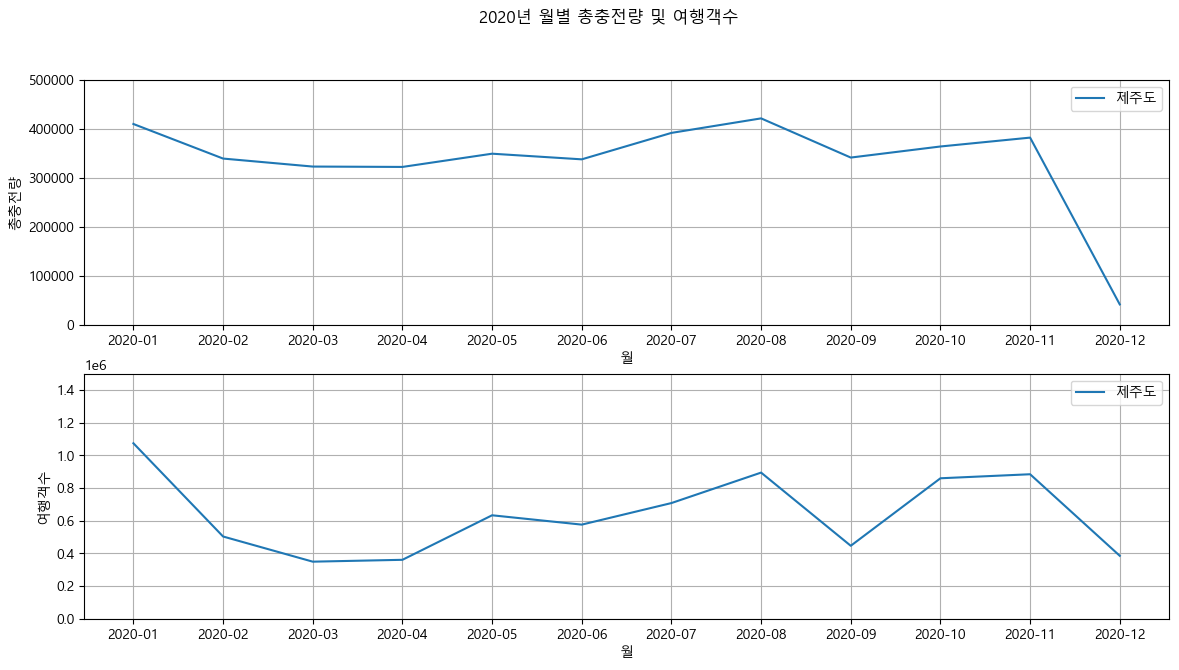

In [87]:
charge = df['제주도(총충전량)']
tourist = df['제주도(여행객수)']

fig = plt.figure(figsize=(14,7))
fig.suptitle('2020년 월별 총충전량 및 여행객수')

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(charge.index, charge, label='제주도')
ax2.plot(tourist.index, tourist, label='제주도')

ax1.legend(loc='best')
ax2.legend(loc='best')

ax1.grid(True)
ax2.grid(True)

ax1.set_ylim(0, 500000)
ax2.set_ylim(0, 1500000)

ax1.set_xlabel('월')
ax2.set_xlabel('월')

ax1.set_ylabel('총충전량')
ax2.set_ylabel('여행객수')

plt.show()

In [37]:
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

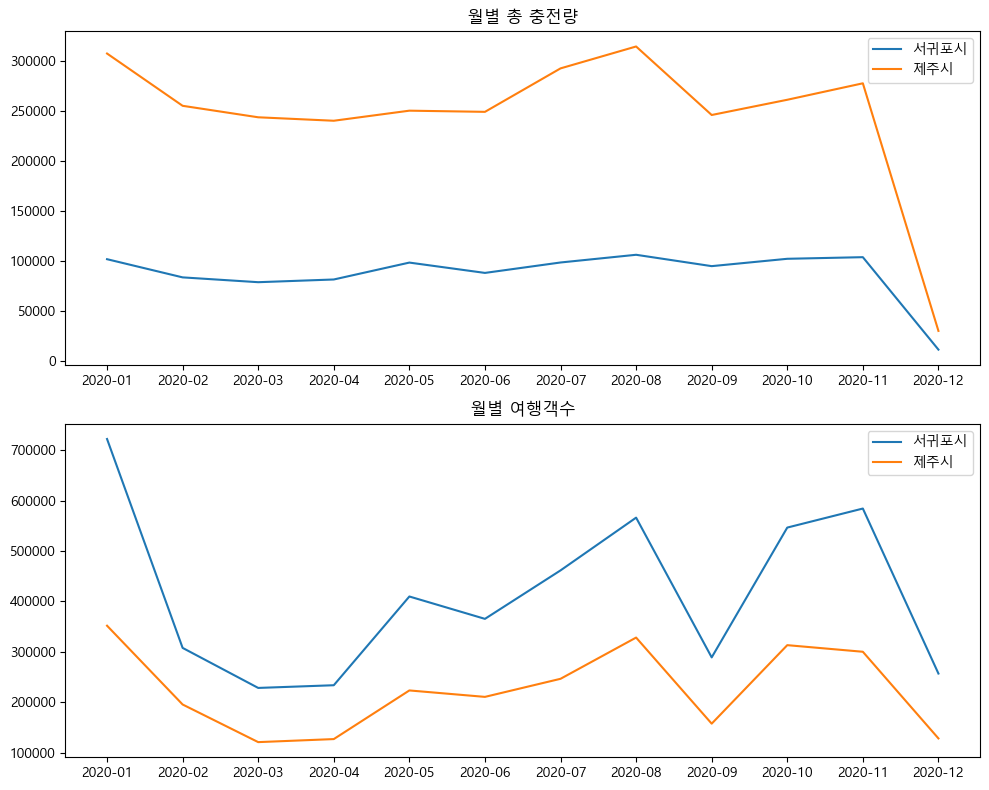

In [ ]:
charge = df[['서귀포시(총충전량)', '제주시(총충전량)']]
tourist = df[['서귀포시(여행객수)', '제주시(여행객수)']]

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(charge.index, charge['서귀포시(총충전량)'], label='서귀포시')
axs[0].plot(charge.index, charge['제주시(총충전량)'], label='제주시')
axs[0].legend()
axs[0].set_title('월별 총 충전량')

axs[1].plot(tourist.index, tourist['서귀포시(여행객수)'], label='서귀포시')
axs[1].plot(tourist.index, tourist['제주시(여행객수)'], label='제주시')
axs[1].legend()
axs[1].set_title('월별 여행객수')

plt.tight_layout()
plt.show()

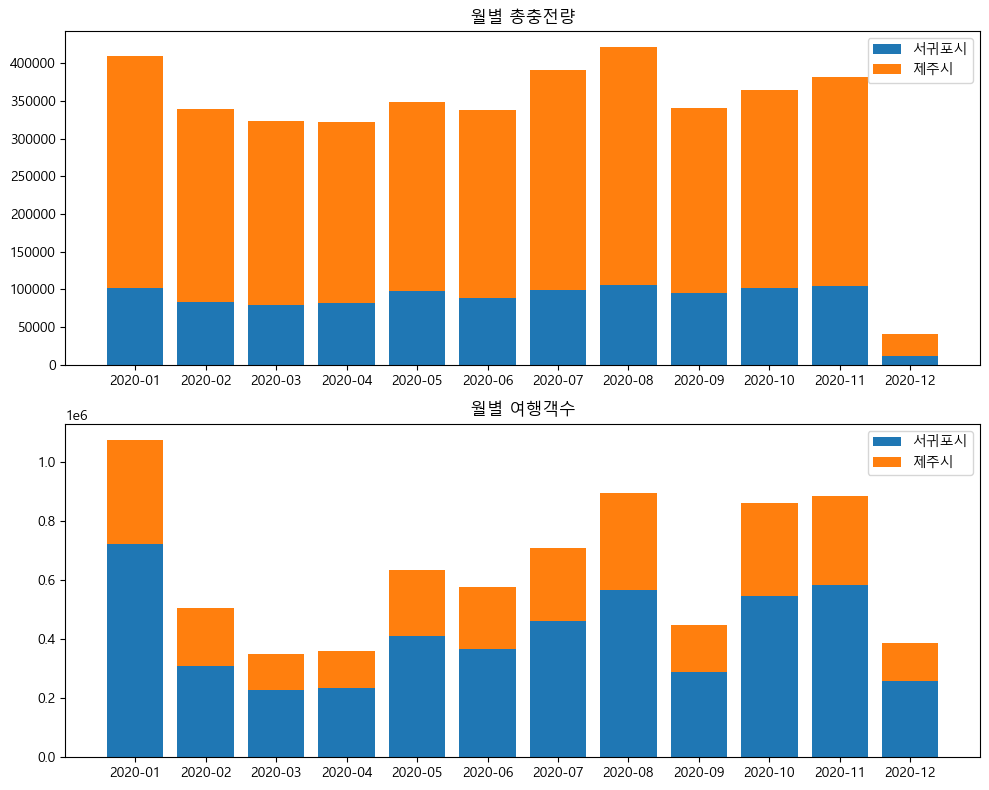

In [ ]:
charge = df[['서귀포시(총충전량)', '제주시(총충전량)']]
tourist = df[['서귀포시(여행객수)', '제주시(여행객수)']]

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].bar(charge.index, charge['서귀포시(총충전량)'], label='서귀포시')
axs[0].bar(charge.index, charge['제주시(총충전량)'], label='제주시', bottom=charge['서귀포시(총충전량)'])
axs[0].legend()
axs[0].set_title('월별 총충전량')

axs[1].bar(tourist.index, tourist['서귀포시(여행객수)'], label='서귀포시')
axs[1].bar(tourist.index, tourist['제주시(여행객수)'], label='제주시', bottom=tourist['서귀포시(여행객수)'])
axs[1].legend()
axs[1].set_title('월별 여행객수')

plt.tight_layout()
plt.show()

In [ ]:
df

구,서귀포시(총충전량),제주시(총충전량),서귀포시(여행객수),제주시(여행객수)
2020-01,101867.6950,307775.675000,722356,351884
2020-02,83660.2300,255440.225000,307851,195555
2020-03,78834.3800,243940.670000,228424,120901
2020-04,81547.0450,240473.344866,233768,126930
2020-05,98466.4580,250564.545000,409849,223446
2020-06,88129.4900,249388.585000,365462,210669
2020-07,98569.0375,292902.970000,461629,246534
2020-08,106281.8350,314822.807000,566304,328351
2020-09,94906.8850,246233.441000,289011,157542
2020-10,102265.9050,261479.297500,546583,313294


In [ ]:
new_jeju2020

구,서귀포시(여행객수),제주시(여행객수)
2020-01,722356,351884
2020-02,307851,195555
2020-03,228424,120901
2020-04,233768,126930
2020-05,409849,223446
2020-06,365462,210669
2020-07,461629,246534
2020-08,566304,328351
2020-09,289011,157542
2020-10,546583,313294


In [ ]:
correlation = df[['서귀포시(여행객수)', '제주시(여행객수)']].corr()
print(correlation)

Empty DataFrame
Columns: []
Index: []


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2020-01 to 2020-12
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   서귀포시(총충전량)  12 non-null     float64
 1   제주시(총충전량)   12 non-null     float64
 2   서귀포시(여행객수)  12 non-null     object 
 3   제주시(여행객수)   12 non-null     object 
dtypes: float64(2), object(2)
memory usage: 480.0+ bytes


In [33]:
# df.info()에서 object로 표시되는 열만 선택
obj_cols = df.select_dtypes(include='object').columns

df[obj_cols] = df[obj_cols].apply(pd.to_numeric, errors='coerce')

df = df.astype(float)

### 제주시/서귀포시 총충전량과 여행객수 

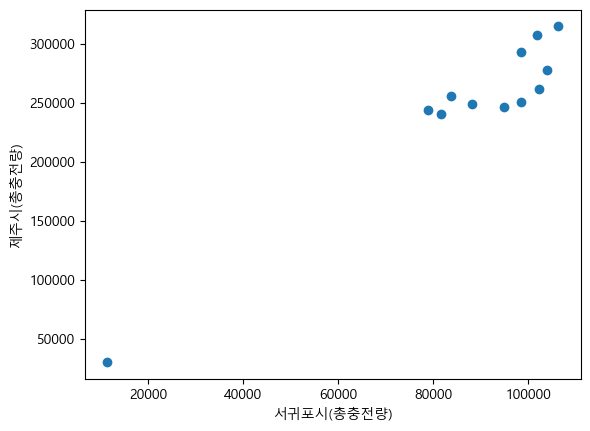

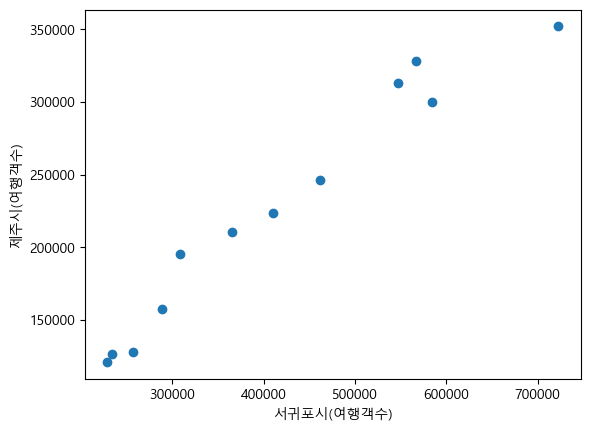

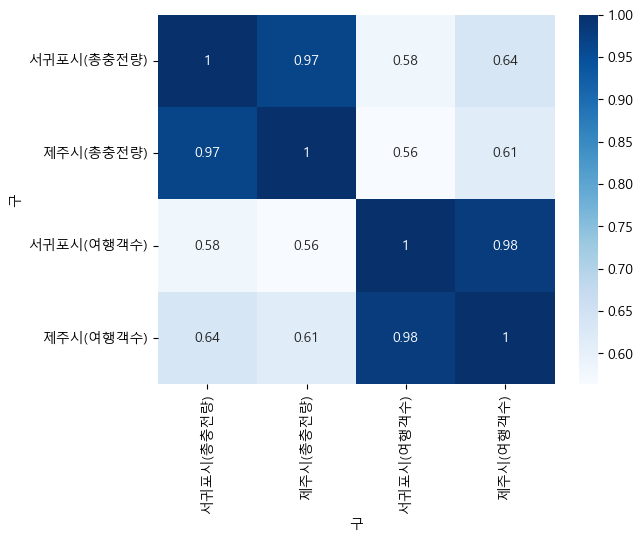

In [ ]:
plt.scatter(df['서귀포시(총충전량)'], df['제주시(총충전량)'])
plt.xlabel('서귀포시(총충전량)')
plt.ylabel('제주시(총충전량)')
plt.show()

plt.scatter(df['서귀포시(여행객수)'], df['제주시(여행객수)'])
plt.xlabel('서귀포시(여행객수)')
plt.ylabel('제주시(여행객수)')
plt.show()

sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

In [ ]:
corr_charge_jeju = df['제주시(총충전량)'].corr(df['제주시(여행객수)'])
corr_charge_seogwipo = df['서귀포시(총충전량)'].corr(df['서귀포시(여행객수)'])
corr_charge_total = df[['제주시(총충전량)', '서귀포시(총충전량)', '제주시(여행객수)', '서귀포시(여행객수)']].corr()

print('제주시 충전량과 여행객수 간의 상관계수:', corr_charge_jeju)
print('서귀포시 충전량과 여행객수 간의 상관계수:', corr_charge_seogwipo)
print('서귀포시와 제주시 총 충전량과 여행객 수 간의 상관계수:', corr_charge_total.loc['제주시(총충전량)', '서귀포시(여행객수)'])

제주시 충전량과 여행객수 간의 상관계수: 0.6132923379078155
서귀포시 충전량과 여행객수 간의 상관계수: 0.58162814527836
서귀포시와 제주시 총 충전량과 여행객 수 간의 상관계수: 0.5636551442589322
